# Práctico 1: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar un sistema de recomendación basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
artist_data = pd.read_csv("./data/lastfm/artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [3]:
user_artist_plays = pd.read_csv("./data/lastfm/user_artists.dat", sep="\t")
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

#### Artistas más escuchados

In [4]:
# creamos una lista de todos los artistas mediante 'artist_list'
artist_list = user_artist_plays['artistID'].unique()

# inicializamos 'artist_count'
artist_count = []

# iteramos por cada artista
for artist in artist_list:
    
    #filtramos el dataset por artista mediante 'mask_artist'
    mask_artist = user_artist_plays['artistID'] == artist
    
    # sumamos el total de escuchados por artista mediante 'sum_weight'
    sum_artist = sum( user_artist_plays[ mask_artist ]['weight'] )
        
    # guardamos en 'artist_count'
    artist_count = artist_count + [( artist, sum_artist )]

In [5]:
# ordenamos por artistas más escuchados
artist_count.sort(key=lambda tup: tup[1], reverse = True)

In [6]:
# vemos los primeros 10 artistas más escuchados
for x in artist_count[:10]:
    print( artist_data[ artist_data['id'] == x[0] ]['name'] )

283    Britney Spears
Name: name, dtype: object
66    Depeche Mode
Name: name, dtype: object
83    Lady Gaga
Name: name, dtype: object
286    Christina Aguilera
Name: name, dtype: object
492    Paramore
Name: name, dtype: object
61    Madonna
Name: name, dtype: object
282    Rihanna
Name: name, dtype: object
695    Shakira
Name: name, dtype: object
221    The Beatles
Name: name, dtype: object
294    Katy Perry
Name: name, dtype: object


#### Distribución *cantidad de listens* por usuario

Estudiamos la relación entre usuarios en función de cuántos *listening* tiene cada uno.
Ordenamos los resultados en función de más cantidad de *listening*.

In [7]:
# creamos una lista de todos los artistas mediante 'user_list'
user_list = user_artist_plays['userID'].unique()

# inicializamos 'artist_count'
user_count = []

# iteramos por cada artista
for user in user_list:
    
    #filtramos el dataset por artista mediante 'mask_user'
    mask_user = user_artist_plays['userID'] == user
    
    # sumamos el total de escuchados por artista mediante 'sum_weight'
    sum_user = sum( user_artist_plays[ mask_user ]['weight'] )
        
    # guardamos en 'user_count'
    user_count = user_count + [( user, sum_user )]

In [8]:
# ordenamos por artistas más escuchados
user_count.sort(key=lambda tup: tup[1], reverse = True)

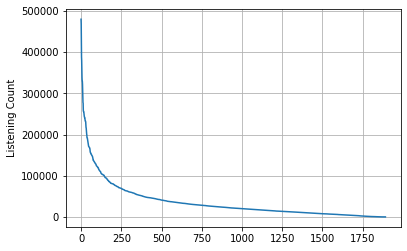

In [9]:
# graficamos la distribución de cantidad de listen por usuario
fig, ax = plt.subplots()
ax.plot( [count[1] for count in user_count] )

ax.set(ylabel='Listening Count')
ax.grid()

plt.show()

#### Género más escuchado

Para analizar los género escuchado usamos el archivo 'user_taggedartists.dat'.
Este archivo contiene las etiquetas asignadas a los artistas prevista por cada usuario.

*Para relacionar 'tagsID' con su género musical se debe usar el archivo 'tags.dat' pero tiene un error.*

In [10]:
tags_data = pd.read_csv("data/lastfm/user_taggedartists.dat", sep="\t")
tags_data.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


Estudiamos el dataset en mayor detalle.
A modo de ejemplo, vemos el artista con mayor cantidad de 'listening' y estudiamos las etiquetas que han sido asignadas por los usuarios.

In [11]:
mask_artist = tags_data[ 'artistID' ] == artist_count[0][0]
tags_data[ mask_artist ]

,userID,artistID,tagID,day,month,year
520,12,289,24,1,2,2010
521,12,289,39,1,2,2010
1983,21,289,24,1,9,2006
1984,21,289,39,1,9,2006
1985,21,289,73,1,9,2006
...,...,...,...,...,...,...
185105,2072,289,200,1,12,2007
185106,2072,289,209,1,12,2007
185107,2072,289,346,1,12,2007
185108,2072,289,2098,1,12,2007


In [12]:
len( tags_data[mask_artist]['tagID'].unique() )

329

Para el artista más escuchado existen 329 etiquetas de género musical.
Esto es de esperarse, pues el género es asignado por cada usuario y pueden o no coincidir.
Además, también se observa que en varios casos el mismo usuario asignó distintas etiquetas al mismo artista.
Esto puede deberse al hecho que cada canción del artista puede pertenecer a distintos géneros musicales.

Por lo tanto, dado que no existe una relación inyectiva entre artista y etiqueta y que sólo se cuenta con la cantidad de escuchados por artista (sin distinguir canción o etiqueta) no se puede estudiar el género más escuchado.

## Ejercicio 2 - Matriz de Usuario-Contenido

En este ejercicio, a partir del conjunto de datos, deberán generar una matriz de usuario-contenido. Tengan en cuenta que los ratings, en este caso, son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a cierto artista.

In [13]:
# armamos la matriz de Usuario - Contenido
user_artist_mat = user_artist_plays.pivot( index = 'userID', columns = 'artistID', values = 'weight' )

In [14]:
# reemplazamos 'NaN' con ceros
user_artist_mat = user_artist_mat.fillna(0)

In [15]:
# cambiamos el tipo de variable a números enteros
user_artist_mat = user_artist_mat.astype('int')

In [16]:
user_artist_mat.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# cambiamos el nombre de la columna 'id' de 'artist_data' para poder unir con el dataset 'user_artist_plays'
artist_data = artist_data.rename( columns = { 'id': 'artistID' } )

# unimos los dataset por la columna 'artistID'
user_artist_plays0 = pd.merge(user_artist_plays, artist_data, on = 'artistID')

# nos quedamos sólo con las columnas 'userID'
user_artist_plays0 = user_artist_plays0.drop( columns = ['artistID', 'url', 'pictureURL'] )

# renombramos las columnas
user_artist_plays0 = user_artist_plays0.rename( columns = { 'userID': 'User', 'name': 'Artist' } )

# reordenamos las columnas
new_index = ['User', 'Artist', 'weight']
user_artist_plays0 = user_artist_plays0.reindex( new_index, axis = 'columns')

# armamos la matriz de Usuario - Contenido
user_artist_mat0 = user_artist_plays0.pivot( index = 'User', columns = 'Artist', values = 'weight' )

# reemplazamos 'NaN' con ceros
user_artist_mat0 = user_artist_mat0.fillna(0)

# cambiamos el tipo de variable a números enteros
user_artist_mat0 = user_artist_mat0.astype('int')

# visualizamos el nuevo dataset
user_artist_mat0.head()

Artist,!!!,!DISTAIN,!deladap,#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,(We Are) Performance,...,티아라,현아,ＬｕＬｕ,ＭＡＮＮＥＱＵＩＮ,ＰＥＲＥＳＴＲＯＩＫＡ,ＲＥＤ,ＶａｎｅｓｓＡ,ｂｏｏｇｉｅｍａｎ,ｂｏｒｎ,ｍａｃｈｉｎｅ
User,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ejercicio 3 - Entrenamiento del algoritmo de recomendación

Utilizando las herramientas brindadas por Surpr!se, entrenen varios modelos de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo.

Si necesitan inspiración, les recomiendo revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).

In [18]:
# importamos librerías

from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split
from surprise.accuracy import rmse

# basic algorithms
from surprise import NormalPredictor, BaselineOnly

# k-NN algorithms
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline

# matrix factorization-based algorithms
from surprise import SVD, SVDpp, NMF

# other algorithms
from surprise import SlopeOne, CoClustering

In [19]:
# definimos rango de valores
min_scale = min( user_artist_plays['weight'] )
max_scale = max( user_artist_plays['weight'] )
print( min_scale, max_scale )

1 352698


In [20]:
reader = Reader( rating_scale = ( min_scale, max_scale ) )
uap = Dataset.load_from_df( user_artist_plays, reader )

Probamos entrenar con varios modelos que usan algoritmos de filtro colaborativo.
Usamos *Cross Validation*.

In [22]:
models = [NormalPredictor(), BaselineOnly(),
          KNNBasic(), KNNWithMeans(), KNNWithZScore(), KNNBaseline(),
          SVD(), SVDpp(), NMF(),
          SlopeOne()]#, CoClustering()]

In [24]:
benchmark = []

# Iterate over all algorithms
for model in models:

    print('Modelo:', str(model).split(' ')[0].split('.')[-1] )
    
    # Perform cross validation
    results = cross_validate( model, uap, measures=['RMSE', 'MAE'], cv=3, verbose = True )
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean( axis = 0 )
    tmp = tmp.append(pd.Series( [ str(model).split(' ')[0].split('.')[-1] ], index=['Model'] ) )
    benchmark.append(tmp)
    
    print('')

Modelo: NormalPredictor
Evaluating RMSE, MAE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    4428.61824603.26494813.93064615.2712157.5321
MAE (testset)     2134.57912085.68302042.81472087.692337.4896 
Fit time          0.09    0.12    0.12    0.11    0.01    
Test time         0.20    0.20    0.24    0.21    0.02    

Modelo: BaselineOnly
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    3614.31203212.63524144.59753657.1816381.6777
MAE (testset)     700.3595701.5892713.8531705.26736.0918  
Fit time          0.27    0.28    0.27    0.27    0.01    
Test time         0.14    0.15    0.15    0.15    0.00    

Modelo: KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...


Guardamos los resultados en un dataframe *surprise_results*.

In [25]:
surprise_results = pd.DataFrame(benchmark).set_index('Model').sort_values('test_rmse')
surprise_results

,test_rmse,test_mae,fit_time,test_time
Model,,,,
BaselineOnly,3657.181579,705.267259,0.274535,0.146240
SlopeOne,3735.822567,792.997200,10.707137,3.692954
NMF,3813.056989,770.286433,4.864760,0.228574
KNNWithMeans,3982.172432,806.805180,0.316138,2.689017
KNNWithZScore,4318.416840,831.171461,0.378650,2.735953
KNNBaseline,4452.022736,748.187023,0.574487,3.020147
KNNBasic,4461.695233,798.268638,0.314636,2.437827
NormalPredictor,4615.271200,2087.692270,0.108260,0.213876
SVDpp,351961.395485,351930.126374,29.771512,1.513803


El modelo *BaselineOnly* fue el que mejor *RMSE* dio.
Procedemos con este modelo y usamos *Alternating Least Squares* (ALS) y *Stochastic Gradient Descent* (SGD).

In [33]:
print('Using ALS')
als_options = { 'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5 }
model = BaselineOnly( bsl_options = als_options)
cross_validate( model, uap, measures = ['RMSE','MAE'], cv = 5, verbose = False )

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([5022.45786358, 3146.18450046, 3020.66637929, 3451.9929671 ,
        3372.36662105]),
 'test_mae': array([742.14097381, 674.66437331, 710.01080548, 697.46538751,
        700.88062884]),
 'fit_time': (0.186631441116333,
  0.2096419334411621,
  0.30500221252441406,
  0.20816802978515625,
  0.2139148712158203),
 'test_time': (0.3059670925140381,
  0.1010887622833252,
  0.09982013702392578,
  0.09476590156555176,
  0.10289931297302246)}

In [34]:
print('Using SGD')
sgd_options = { 'method': 'sgd', 'learning_rate': .00005 }
model = BaselineOnly( bsl_options = sgd_options)
cross_validate( model, uap, measures=['RMSE', 'MAE'], cv = 5, verbose = False )

Using SGD
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


{'test_rmse': array([3898.58730692, 4398.08907102, 3539.18007092, 3736.04170467,
        2925.62484081]),
 'test_mae': array([820.02143219, 833.05254145, 784.56012544, 797.38117651,
        789.32139306]),
 'fit_time': (0.4386422634124756,
  0.4635658264160156,
  0.45430827140808105,
  0.45059728622436523,
  0.454237699508667),
 'test_time': (0.3166310787200928,
  0.08329463005065918,
  0.08492112159729004,
  0.08428668975830078,
  0.08477210998535156)}

Vemos que el algoritmo SGD da mejor RMSE y MAE accuracy.

Generamos los conjunto de entrenamiento *uap_train*, de validación *uap_test*.
Usamos la métrica de accuracy del error cuadrático medio *RMSE*.
Luego, usamos el método *fit* que entrena el algoritmo en *uap_train* y el método *test* que devuelve las predicciones hechas para el conjunto de validación.

In [35]:
uap_train, uap_test = train_test_split( uap, test_size = 0.2 )
model = BaselineOnly( bsl_options = sgd_options).fit( uap_train )
predictions = model.test( uap_test )
print( "RMSE on test: {:.4f}".format( rmse( predictions, verbose = False ) ) )

Estimating biases using sgd...
RMSE on test: 2596.2867


Armamos un dataframe con todas las predicciones para estudiarlas con mayor detalla.

In [36]:
def get_Iu(uid):
    """ return the number of items rated by given user 
    args: uid: the id of the user
    returns: the number of items rated by the user
    """
    try:
        return len(uap_train.ur[uap_train.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args: iid: the raw id of the item
    returns: the number of users that have rated the item.
    """
    try: 
        return len(uap_train.ir[uap_train.to_inner_iid(iid)])
    except ValueError:
        return 0

In [37]:
df_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_pred['Iu'] = df_pred.uid.apply(get_Iu)
df_pred['Ui'] = df_pred.iid.apply(get_Ui)
df_pred['err'] = abs(df_pred.est - df_pred.rui)

In [38]:
df_pred.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,1034,400,131.0,750.291983,{'was_impossible': False},41,18,619.291983
1,98,1249,51.0,749.859961,{'was_impossible': False},39,128,698.859961
2,1711,206,900.0,787.208142,{'was_impossible': False},40,66,112.791858
3,1895,292,1460.0,1307.001364,{'was_impossible': False},39,331,152.998636
4,2059,323,437.0,812.479197,{'was_impossible': False},42,43,375.479197


Estudiamos las mejores y peores predicciones.

In [40]:
best_predictions = df_pred.sort_values(by='err')[:10]
worst_predictions = df_pred.sort_values(by='err')[-10:]

In [41]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
7280,1532,294,826.0,826.013558,{'was_impossible': False},37,129,0.013558
13405,966,292,1290.0,1289.927365,{'was_impossible': False},41,331,0.072635
1361,925,2053,778.0,777.775674,{'was_impossible': False},37,3,0.224326
5727,1453,349,727.0,726.465914,{'was_impossible': False},38,184,0.534086
554,432,4850,741.0,741.588906,{'was_impossible': False},40,11,0.588906
1942,1407,229,721.0,721.600039,{'was_impossible': False},38,235,0.600039
17157,823,10406,778.0,777.237691,{'was_impossible': False},41,0,0.762309
9863,329,71,774.0,773.141288,{'was_impossible': False},39,45,0.858712
152,140,418,788.0,786.813945,{'was_impossible': False},40,121,1.186055
4542,861,291,804.0,802.402632,{'was_impossible': False},37,205,1.597368


In [42]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
5381,385,461,52611.0,1052.609129,{'was_impossible': False},42,229,51558.390871
8874,797,344,53395.0,1011.469130,{'was_impossible': False},9,192,52383.530870
9475,227,292,55045.0,1340.641141,{'was_impossible': False},41,331,53704.358859
4743,256,2548,56650.0,794.798275,{'was_impossible': False},38,23,55855.201725
1928,1924,498,66761.0,1296.896418,{'was_impossible': False},37,322,65464.103582
2202,767,72,71852.0,1614.563151,{'was_impossible': False},38,221,70237.436849
15265,298,903,73771.0,735.606842,{'was_impossible': False},39,146,73035.393158
16778,1559,458,82806.0,794.271353,{'was_impossible': False},39,72,82011.728647
12797,800,707,82951.0,848.921222,{'was_impossible': False},41,177,82102.078778
3738,757,701,169596.0,1198.350537,{'was_impossible': False},39,258,168397.649463


Estudiamos en detalle la última fila de la tabla de arriba que corresponde a la peor predicción.
La fila nos dice que el artista 701 fue escuchado por 258 usuarios y que particularmente, el usuario 757 lo escuchó 169596 veces. El modelo predice 1198.

Estudiamos en mayor detalle el artista 701.

In [46]:
mask_artist701 = artist_data['artistID'] == 701
artist_data[ mask_artist701 ]

,artistID,name,url,pictureURL
695,701,Shakira,http://www.last.fm/music/Shakira,http://userserve-ak.last.fm/serve/252/52116105...


In [50]:
user_artist_plays[ user_artist_plays['artistID'] == 701 ].describe()

,userID,artistID,weight
count,319.000000,319.0,319.000000
mean,980.470219,701.0,2158.398119
std,586.250396,0.0,13936.239946
min,17.000000,701.0,3.000000
25%,482.500000,701.0,148.500000
50%,984.000000,701.0,392.000000
75%,1476.500000,701.0,962.000000
max,2087.000000,701.0,172496.000000


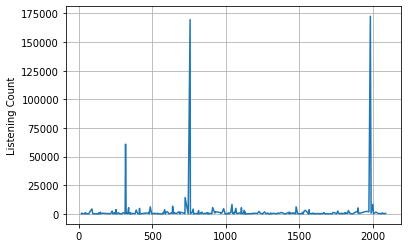

In [51]:
# graficamos la distribución de cantidad de listen por usuario

x = user_artist_plays[ user_artist_plays['artistID'] == 701 ]['userID']
y = user_artist_plays[ user_artist_plays['artistID'] == 701 ]['weight']

fig, ax = plt.subplots()
ax.plot( x, y )

ax.set(ylabel='Listening Count')
ax.grid()

plt.show()

El artista 701 corresponde a Shakira.
El promedio de escuchas por usuario es de 2158.4 veces.
Claramente, el usuario que da la peor predicción es uno de los usuarios que más veces escuchó a Shakira por lo que puede considerarse como un *outsider*.

## Ejercicio 4 - Sistema de recomendación

A partir del mejor modelo de recomendación que hayan sugerido en el caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares.

La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [58]:
import numpy as np
from scipy.sparse import csr_matrix

In [67]:
def create_X(df):

    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        artist_mapper: dict that maps artist id's to movie indices
        artist_inv_mapper: dict that maps artists indices to movie id's
    """

    M = df['userID'].nunique()
    N = df['artistID'].nunique()

    user_mapper = dict(zip(np.unique(df["userID"]), list(range(M))))
    artist_mapper = dict(zip(np.unique(df["artistID"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userID"])))
    artist_inv_mapper = dict(zip(list(range(N)), np.unique(df["artistID"])))
    
    user_index = [user_mapper[i] for i in df['userID']]
    item_index = [artist_mapper[i] for i in df['artistID']]

    X = csr_matrix((df["weight"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(user_artist_plays)

In [70]:
# normalizamos la matriz X
n_ratings_per_artist = X.getnnz(axis=0)
sum_ratings_per_artist = X.sum(axis=0)
mean_rating_per_artist = sum_ratings_per_artist/n_ratings_per_artist
X_mean_artist = np.tile(mean_rating_per_artist, (X.shape[0],1))
X_norm = X - csr_matrix(X_mean_artist)

In [71]:
from sklearn.neighbors import NearestNeighbors

In [75]:
def find_similar_artists(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):

    """
    Finds k-nearest neighbours for a given artist id.
    
    Args:
        artist_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """

    X = X.T
    neighbour_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
        
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors = k+1, algorithm = "brute", metric = metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors( artist_vec, return_distance = False)

    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
    
    neighbour_ids.pop(0)
    
    return neighbour_ids

Armamos la función *recomendar*.
Se le debe dar el nombre de un artista y la cantidad de recomendaciones que se deseen.
Devuelve una lis

In [151]:
def recomendar(artist_name, k):

    print(k, 'artistas recomendads para', artist_name, ':')
    print('')
    
    mask_artist_name = artist_data['name'] == artist_name
    artist_id = artist_data[ mask_artist_name ]['artistID'].max()
    
    rec = find_similar_artists(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine')
    
    for idx in rec:
        
        mask_artist_id = artist_data[ 'artistID' ] == idx
        name = artist_data[ mask_artist_id ]['name'].max()
        print( name )

Probamos el recomendador...

In [152]:
recomendar('Pink Floyd', 10)

10 artistas recomendads para Pink Floyd :

Neu!
Rare Bird
Kayo Dot
Can
Faust
Gentle Giant
Hawkwind
Amon Düül II
My Dying Bride


In [153]:
recomendar('The Beatles', 20)

20 artistas recomendads para The Beatles :

John Lennon
Paul McCartney
George Harrison
Imaad Wasif
Paul McCartney & Wings
The White Stripes
The Runaways
Brendan Benson
The Raconteurs
Amy Winehouse
The Small Faces
Toque No Altar
Self Against City
Lázaro
The Searchers
Peter & Gordon
Bread
Maria Rita
My American Heart


In [155]:
recomendar('Rhianna',5)

5 artistas recomendads para Rhianna :

110
Shakira feat. Kid Cudi & Benny
Shamur
Sofia Nizharadze
